# Simple image Classification (multi-class) with MNIST dataset

### Author : Olufemi Victor Tolulope

###### Team: Project team Pluto: Basics to Computer Vision with Tensorflow.

#### Week 3

This is the third week with team pluto, and it has been awesome thus far, in this week's project work, we perform simple multi classification techniques using simple neural networks. This tutorial as before uses the Keras API with tensorflow as backend.

The dataset used is the popular MNIST dataset.

To get started, we import the tools we need

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses

Tensorflow comes with the mnist dataset packed in, so we can easily load the dataset from there. After loading the dataset, i quickly normalize the vlaues, from Elisha's blogposts, we've noticed how that neural networks work better with small input values.

In [2]:
mnist = datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

###### Let's Check some facts about the dataset.

In [3]:
print("How many images do we have in the training set? ",len(x_train))
print("How many images do we have in the validation set? ",len(x_test))
print("Check the size of image in the training set",x_train[1].shape)
print("Check the size of the image in the validation set? ",x_test[1].shape)
print("How many unique classes do we have in the dataset? ",len(np.unique(y_test)))
print("Kindly list these unique classes? ", np.unique(y_test))

How many images do we have in the training set?  60000
How many images do we have in the validation set?  10000
Check the size of image in the training set (28, 28)
Check the size of the image in the validation set?  (28, 28)
How many unique classes do we have in the dataset?  10
Kindly list these unique classes?  [0 1 2 3 4 5 6 7 8 9]


###### Plot in and view some of the images in the dataset.

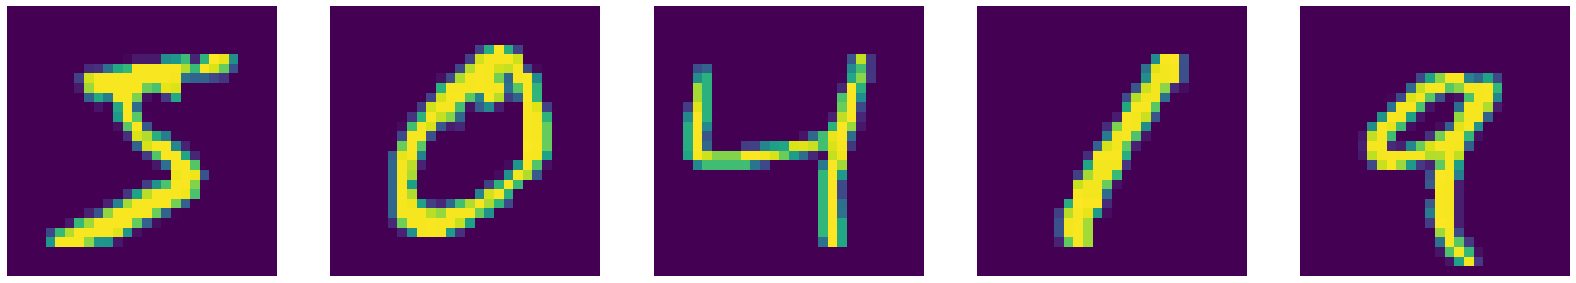

In [4]:
fig, axis = plt.subplots(1,5, figsize = (28,28))
for i, ax in enumerate(axis):
    ax.imshow(x_train[i])
    ax.axis("off")
plt.show()

###### Building the model
The next steps are quite simple, the model is a simple neural network which consists of:

1. A flattened layer
2. A dense layer (hidden layer with 128 nodes and with activation function as relu) 
3. A dropout layer.
4. An output layer with 10 outputs for 10 classes.

In [5]:
model = tf.keras.models.Sequential()
model.add(layers.Flatten(input_shape = (28,28)))
model.add(layers.Dense(128,activation ="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10))

Here we compile the model using the ADAM optimizer and SparseCategoricalCrossentropy as the loss function.

After all said and done, we fit the model pasing in the validation data as well as the batch size which I set to 32. The model is to fit for 30 epochs.

In [6]:
model.compile(optimizer = 'adam', loss = losses.SparseCategoricalCrossentropy(from_logits = True) , metrics = ["accuracy"])

model_history = model.fit(x_train, y_train, epochs = 30, validation_data = (x_test, y_test), batch_size = 32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 16s 267us/sample - loss: 0.2973 - accuracy: 0.9128 - val_loss: 0.1424 - val_accuracy: 0.9573
Epoch 2/30
60000/60000 [==============================] - 8s 141us/sample - loss: 0.1423 - accuracy: 0.9580 - val_loss: 0.0977 - val_accuracy: 0.9701
Epoch 3/30
60000/60000 [==============================] - 9s 145us/sample - loss: 0.1089 - accuracy: 0.9669 - val_loss: 0.0891 - val_accuracy: 0.9708
Epoch 4/30
60000/60000 [==============================] - 8s 141us/sample - loss: 0.0880 - accuracy: 0.9732 - val_loss: 0.0766 - val_accuracy: 0.9768
Epoch 5/30
60000/60000 [==============================] - 10s 170us/sample - loss: 0.0775 - accuracy: 0.9751 - val_loss: 0.0724 - val_accuracy: 0.9773
Epoch 6/30
60000/60000 [==============================] - 11s 180us/sample - loss: 0.0653 - accuracy: 0.9783 - val_loss: 0.0728 - val_accuracy: 0.9779
Epoch 7/30
60000/60000 [=======================

###### A clear view
Here, we see how well the model performed, even though it was not solved using convolutions. The Validation accuracy and Log loss accuracy are quite good.

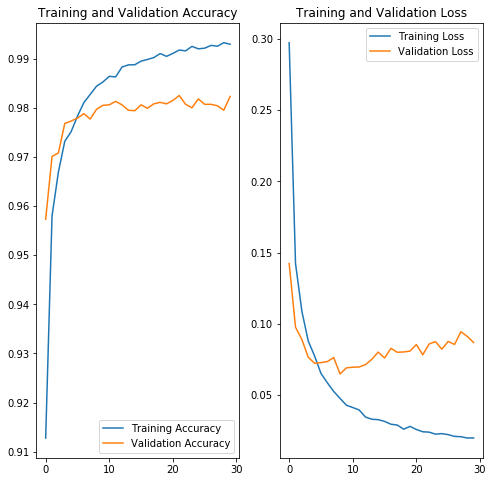

In [7]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

###### With a validation accuracy of 98% we are quite cool, but the question surely arises, can we do better?

Yes!!! sure we can. we could do:

1. Data augumentaion
2. More Regularization Techniques asides dropout.
3. Play around with the hyperparameters.

###### The END